In [3]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Matplotlib is building the font cache; this may take a moment.


In [5]:
# contoh dataset (dummy data)
data = {
    'Pelanggan': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10'],
    'Jumlah_Transaksi' : [5, 15, 7, 20, 3, 11, 8, 12, 1, 17],
    'Total_Belanja' : [500000, 1500000, 700000, 2000000, 300000, 1100000, 800000, 1200000, 1700000, 1600000],
    'Frekuensi_Kunjungan' : [10, 40, 15, 50, 5, 35, 20, 37, 3, 45]
    }

df = pd.DataFrame(data)
df

,Pelanggan,Jumlah_Transaksi,Total_Belanja,Frekuensi_Kunjungan
0,P1,5,500000,10
1,P2,15,1500000,40
2,P3,7,700000,15
3,P4,20,2000000,50
4,P5,3,300000,5
5,P6,11,1100000,35
6,P7,8,800000,20
7,P8,12,1200000,37
8,P9,1,1700000,3
9,P10,17,1600000,45


In [6]:
# preprocessing data (normalisasi data)

# memilih fitur untuk clustering
fitur = df[['Jumlah_Transaksi', 'Total_Belanja', 'Frekuensi_Kunjungan']]

# normalisasi agar skala seimbang
scaler = StandardScaler()
fitur_scaled = scaler.fit_transform(fitur)

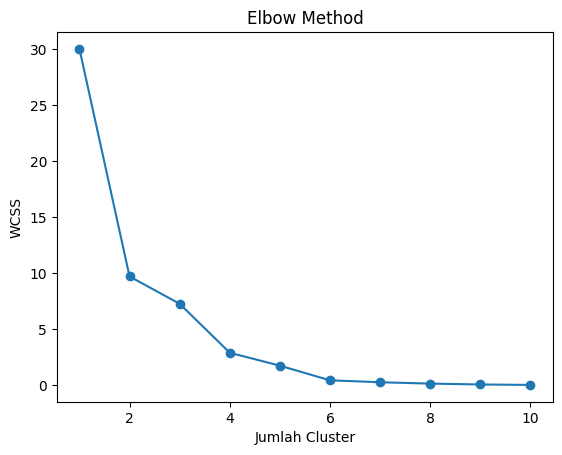

In [7]:
# menentukan jumlah cluster (elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(fitur_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [8]:
# membuat model k-means dan memprediksi cluster

# Misal dari elbow kita pilih k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(fitur_scaled)

# Menampilkan hasil
print(df)

  Pelanggan  Jumlah_Transaksi  Total_Belanja  Frekuensi_Kunjungan  Cluster
0        P1                 5         500000                   10        1
1        P2                15        1500000                   40        2
2        P3                 7         700000                   15        1
3        P4                20        2000000                   50        0
4        P5                 3         300000                    5        1
5        P6                11        1100000                   35        2
6        P7                 8         800000                   20        1
7        P8                12        1200000                   37        2
8        P9                 1        1700000                    3        1
9       P10                17        1600000                   45        2


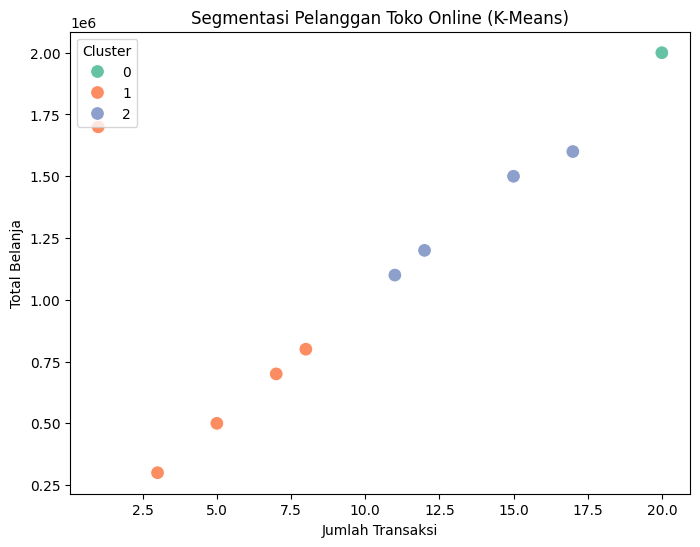

In [9]:
# visualisasi hasil clustering
# Visualisasi dengan scatter plot (menggunakan dua fitur)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Jumlah_Transaksi', y='Total_Belanja', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Segmentasi Pelanggan Toko Online (K-Means)')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Total Belanja')
plt.legend(title='Cluster')
plt.show()

In [10]:
# analisis cluster
# Rata-rata tiap cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

         Jumlah_Transaksi  Total_Belanja  Frekuensi_Kunjungan
Cluster                                                      
0                   20.00      2000000.0                50.00
1                    4.80       800000.0                10.60
2                   13.75      1350000.0                39.25
